In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from netCDF4 import num2date, date2num, Dataset
import pyart
%matplotlib inline

In [4]:
#pp = PdfPages('NEXRAD_Graphs.pdf')

/Users/marvinbertin/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:90: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/marvinbertin/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:667: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


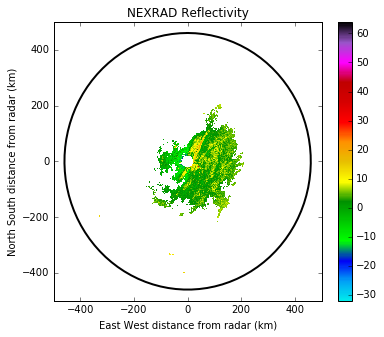

In [5]:
# open the file, create the displays and figure
filename = '/Users/marvinbertin/Desktop/KABR20160203_000845_V06'
radar = pyart.io.read_nexrad_archive(filename)
display = pyart.graph.RadarDisplay(radar)
fig1 = plt.figure(figsize=(6, 5))

# plot super resolution reflectivity
ax = fig1.add_subplot(111)
display.plot('reflectivity', 0, title='NEXRAD Reflectivity',
             vmin=-32, vmax=64, colorbar_label='', ax=ax)
display.plot_range_ring(radar.range['data'][-1]/1000., ax=ax)
display.set_limits(xlim=(-500, 500), ylim=(-500, 500), ax=ax)
plt.show()
fig1.savefig('fig1.png', dpi=fig1.dpi)
#plt.savefig(pp, format='pdf')

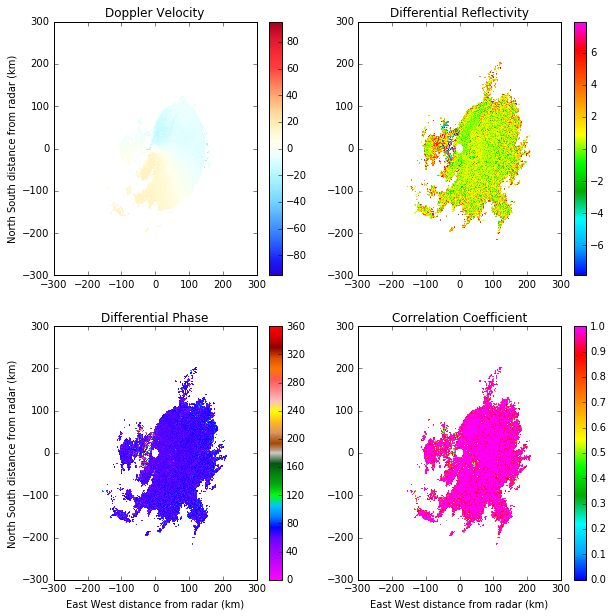

In [7]:
fig2 = plt.figure(figsize=(10, 10))

ax = fig2.add_subplot(221)
display.plot('velocity', 1, ax=ax, title='Doppler Velocity',
             colorbar_label='',
             axislabels=('', 'North South distance from radar (km)'))
display.set_limits((-300, 300), (-300, 300), ax=ax)

ax = fig2.add_subplot(222)
display.plot('differential_reflectivity', 0, ax=ax,
             title='Differential Reflectivity', colorbar_label='',
             axislabels=('', ''))
display.set_limits((-300, 300), (-300, 300), ax=ax)

ax = fig2.add_subplot(223)
display.plot('differential_phase', 0, ax=ax,
             title='Differential Phase', colorbar_label='')
display.set_limits((-300, 300), (-300, 300), ax=ax)

ax = fig2.add_subplot(224)
display.plot('cross_correlation_ratio', 0, ax=ax,
             title='Correlation Coefficient', colorbar_label='',
             axislabels=('East West distance from radar (km)', ''))
display.set_limits((-300, 300), (-300, 300), ax=ax)


plt.show()
fig2.savefig('fig2.png', dpi=fig2.dpi)

#plt.savefig(pp, format='pdf')
#pp.close()